## K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [10]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [11]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

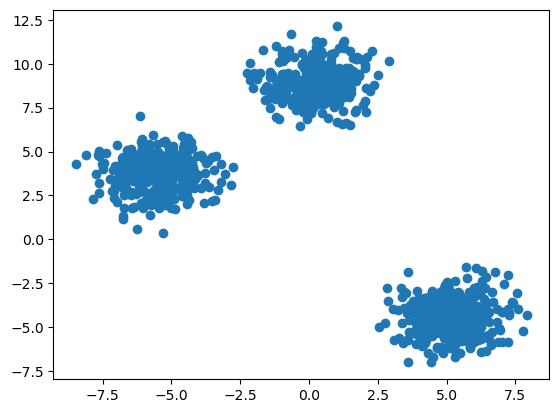

In [13]:
plt.scatter(X[:,0],X[:,1])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.cluster import KMeans

In [18]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [19]:
wcss

[34827.57682552021,
 7935.43728614542,
 1319.273053158561,
 1140.4677884655125,
 992.070850938351,
 853.769238975986,
 757.7187548874325,
 663.5407435896742,
 579.7424093599038,
 531.5192286579304]

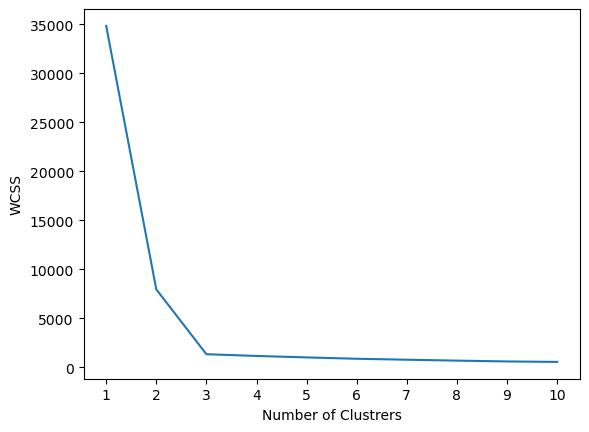

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [23]:
y_labels=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


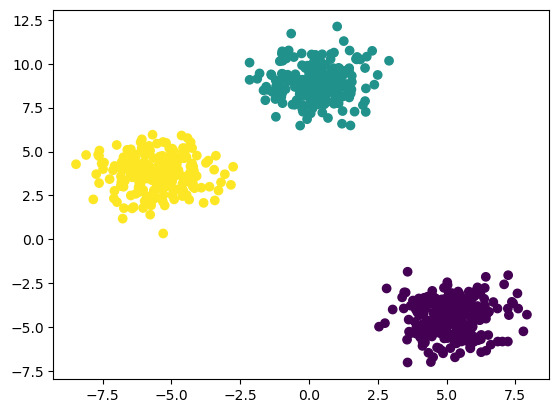

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [25]:
## knee locator
!pip install kneed

In [26]:
from kneed import KneeLocator

In [27]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [28]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [32]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.3375447395994776,
 0.3463673095745714,
 0.3433289183268384,
 0.3456048745725144,
 0.34194498681397534]

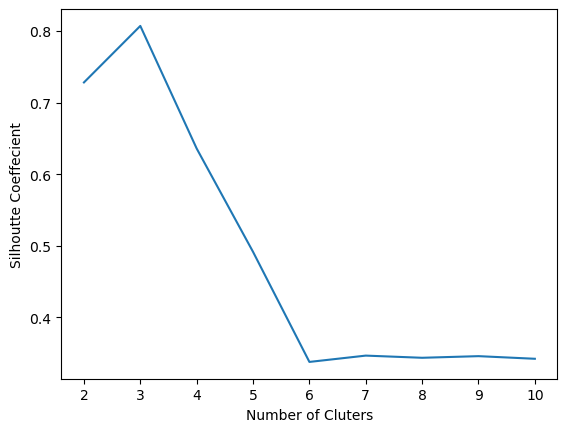

In [33]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()